In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from AdversarialAttack import *
from IPython import display
%matplotlib inline


In [2]:
#Global configuration
attackMode = 'Detection' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 1000 #Query Budgets
NumberOfTest = 15 #Number of test images
random.seed(42) #Set random seeds

hourglass: 0.9856477
guillotine: 0.00010379316
china_cabinet: 0.0001016978
nipple: 7.471215e-05
cougar: 6.023419e-05
dugong: 5.404314e-05


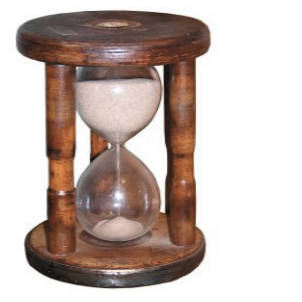

In [3]:
#Prepare test images
File,ImgPre = ResultSave('SignOPT','./Result/InceptionD')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)


In [4]:
from SignOPT import OPT_attack_sign_SGD

In [5]:
#Run the experiments
constraint = np.inf#norm: 2; np.inf
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        attack = OPT_attack_sign_SGD(image)
        timehistory,adversarial=attack.attack_untargeted(query_limit=queryBudgets)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)
        

round 0: Searching for the initial direction on 100 random directions: 
--------> Found distortion 411.9087
--------> Found distortion 327.5633
--------> Found distortion 232.0199
--------> Found distortion 168.4858
--------> Found distortion 44.4950
--------> Found distortion 16.4086
--------> Found distortion 16.2183
--------> Found distortion 14.6068
--------> Found distortion 13.7411
--------> Found distortion 11.3735
--------> Found distortion 11.1035
==========> Found best distortion 11.1035 in 179.0700 seconds using 369 queries: 379


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:0.3198554604950699, Linf:0.0027337596162037014
round 1: Searching for the initial direction on 100 random directions: 
--------> Found distortion 334.0437
--------> Found distortion 313.2711
--------> Found distortion 310.4676
--------> Found distortion 309.9926
--------> Found distortion 306.5952
--------> Found distortion 302.3479
--------> Found distortion 290.7705
==========> Found best distortion 290.7705 in 139.8620 seconds using 293 queries: 299


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:148.25502629781377, Linf:1.0
round 2: Searching for the initial direction on 100 random directions: 
--------> Found distortion 248.2827
--------> Found distortion 240.2540
--------> Found distortion 238.9095
--------> Found distortion 234.1512
--------> Found distortion 209.4824
--------> Found distortion 208.5274
==========> Found best distortion 208.5274 in 140.7640 seconds using 294 queries: 299


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:201.11438325148356, Linf:0.999711032898631
round 3: Searching for the initial direction on 100 random directions: 
--------> Found distortion 27.8345
--------> Found distortion 27.0428
--------> Found distortion 26.1631
--------> Found distortion 25.6936
--------> Found distortion 24.4704
--------> Found distortion 23.0448
--------> Found distortion 18.1472
==========> Found best distortion 18.1472 in 145.2520 seconds using 302 queries: 308


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:15.485724600405371, Linf:0.1354617836219698
round 4: Searching for the initial direction on 100 random directions: 
--------> Found distortion 302.3268
--------> Found distortion 295.4827
--------> Found distortion 294.5488
--------> Found distortion 285.6936
--------> Found distortion 283.9586
--------> Found distortion 282.8456
--------> Found distortion 273.4510
--------> Found distortion 232.9941
==========> Found best distortion 232.9941 in 165.4110 seconds using 344 queries: 351


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:205.3252227448142, Linf:1.0
round 5: Searching for the initial direction on 100 random directions: 
--------> Found distortion 518.2113
--------> Found distortion 518.0487
--------> Found distortion 368.9825
--------> Found distortion 97.3438
--------> Found distortion 97.0787
--------> Found distortion 92.3444
--------> Found distortion 90.2590
--------> Found distortion 74.0020
==========> Found best distortion 74.0020 in 140.4710 seconds using 296 queries: 301


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:22.816312316606567, Linf:0.18567105035439932
round 6: Searching for the initial direction on 100 random directions: 
--------> Found distortion 516.8590
--------> Found distortion 516.7065
--------> Found distortion 516.6493
--------> Found distortion 515.7626
==========> Found best distortion 515.7626 in 124.5070 seconds using 262 queries: 262


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:245.02418758839607, Linf:1.0
round 7: Searching for the initial direction on 100 random directions: 
--------> Found distortion 293.2670
--------> Found distortion 278.0546
--------> Found distortion 247.5193
--------> Found distortion 235.8545
--------> Found distortion 223.6526
--------> Found distortion 221.3832
--------> Found distortion 188.8299
--------> Found distortion 158.0841
--------> Found distortion 157.3254
==========> Found best distortion 157.3254 in 164.8900 seconds using 345 queries: 353


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:149.72158176958428, Linf:0.9941797256469727
round 8: Searching for the initial direction on 100 random directions: 
--------> Found distortion 497.3336
--------> Found distortion 491.1611
--------> Found distortion 423.2485
--------> Found distortion 421.7543
--------> Found distortion 356.3491
--------> Found distortion 335.6759
==========> Found best distortion 335.6759 in 148.2210 seconds using 308 queries: 313


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:228.18696583176933, Linf:1.0
round 9: Searching for the initial direction on 100 random directions: 
--------> Found distortion 518.6578
--------> Found distortion 518.3316
--------> Found distortion 517.7031
--------> Found distortion 439.8696
--------> Found distortion 439.6951
--------> Found distortion 433.0455
==========> Found best distortion 433.0455 in 136.7930 seconds using 289 queries: 291


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:247.7357919683715, Linf:1.0
round 10: Searching for the initial direction on 100 random directions: 
--------> Found distortion 517.8847
--------> Found distortion 367.9003
--------> Found distortion 1.8104
--------> Found distortion 1.7441
--------> Found distortion 1.7032
--------> Found distortion 1.2650
==========> Found best distortion 1.2650 in 101.8760 seconds using 216 queries: 220


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:0.2593789792408948, Linf:0.0023428285392723402
round 11: Searching for the initial direction on 100 random directions: 
--------> Found distortion 164.4166
--------> Found distortion 142.3053
--------> Found distortion 140.5057
==========> Found best distortion 140.5057 in 114.2850 seconds using 238 queries: 240


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:94.65333242571627, Linf:0.9389743204529377
round 12: Searching for the initial direction on 100 random directions: 
--------> Found distortion 483.5312
--------> Found distortion 360.3216
--------> Found distortion 202.1709
--------> Found distortion 115.2127
--------> Found distortion 96.7985
--------> Found distortion 93.9035
--------> Found distortion 92.3109
--------> Found distortion 91.8531
==========> Found best distortion 91.8531 in 159.8150 seconds using 332 queries: 339


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:74.58379816340997, Linf:0.6748945934688217
round 13: Searching for the initial direction on 100 random directions: 
--------> Found distortion 36.1651
--------> Found distortion 36.1204
--------> Found distortion 34.2272
--------> Found distortion 31.8190
==========> Found best distortion 31.8190 in 124.9100 seconds using 259 queries: 262


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:21.465570849670094, Linf:0.20507848887770563
round 14: Searching for the initial direction on 100 random directions: 
--------> Found distortion 519.1184
--------> Found distortion 518.5577
==========> Found best distortion 518.5577 in 63.1380 seconds using 138 queries: 138


  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:247.4307261234278, Linf:1.0


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/server2080ti/anaconda3/envs/Adv/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
(477, 2)
2
149.81763852717597
0.9941797256469727


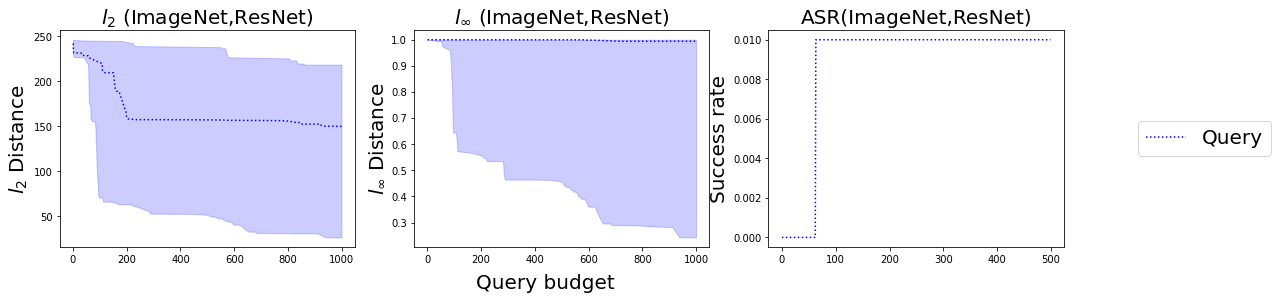

In [6]:
#Preview the results
from Visualization import Result
Valid=100
fontsize=20
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))

vis.Plot(0,Valid,1000,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,1000,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,500,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)

In [7]:
print(File)

./Result/InceptionD/SignOPT.dat
